In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def parse_output(name):
    f = open(name, 'r')
    times = []
    for line in f.readlines():
        if 'decorrido' in line:
            line = line.rstrip()
            time_idx = line.rfind(' ')
            time = float(line[time_idx:-1])
            times.append(time)
    return np.array(times)

In [17]:
copia_1_0 = parse_output('copia_1_vazia')
copia_10_0 = parse_output('copia_10_vazia')
copia_30_0 = parse_output('copia_30_vazia')
copia_1_10 = parse_output('copia_1_10')
copia_10_10 = parse_output('copia_10_10')
copia_30_10 = parse_output('copia_30_10')
copia_1_50 = parse_output('copia_1_50')
copia_10_50 = parse_output('copia_10_50')
copia_30_50 = parse_output('copia_30_50')

In [111]:
copia_30_50

array([16.98192763, 16.11566091, 16.12402725, 16.10890508, 16.09158707,
       16.13606501, 16.20150709, 16.13183951, 16.13133645, 16.11548281,
       16.14663792, 16.17823076, 16.11718416, 16.15242195, 16.13565278,
       16.16495776, 16.12394595, 16.09696102, 16.10375094, 16.15143633,
       16.15388989, 16.15570927, 16.14204383, 16.18486357, 16.12852025,
       16.17247605, 16.16868567, 16.67795277, 17.3655746 , 17.53963518])

In [16]:
rm_1_0 = parse_output('rm_1_vazia')
rm_10_0 = parse_output('rm_10_vazia')
rm_30_0 = parse_output('rm_30_vazia')
rm_1_10 = parse_output('rm_1_10')
rm_10_10 = parse_output('rm_10_10')
rm_30_10 = parse_output('rm_30_10')
rm_1_50 = parse_output('rm_1_50')
rm_10_50 = parse_output('rm_10_50')
rm_30_50 = parse_output('rm_30_50')

In [117]:
rm_10_10

array([0.02642822, 0.03494644, 0.03493738, 0.0272193 , 0.02774286,
       0.04217839, 0.0271008 , 0.02629733, 0.025774  , 0.0269506 ,
       0.04254198, 0.03030491, 0.04624104, 0.02996707, 0.02791905,
       0.02761173, 0.05170178, 0.0292964 , 0.04275155, 0.04683352,
       0.02769995, 0.04564214, 0.02907968, 0.04766679, 0.04231501,
       0.02867627, 0.04869723, 0.02883196, 0.04794121, 0.07812738])

In [119]:
rmdir_vazios = parse_output('rmdir_vazios')
rmdir_cheios = parse_output('rmdir_cheios')
rmdir_10_vazios = parse_output('rmdir_10_vazios')
rmdir_10_cheios = parse_output('rmdir_10_cheios')
rmdir_50_vazios = parse_output('rmdir_50_vazios')
#rmdir_50_cheios = parse_output('rmdir_cheios')

In [64]:
def autolabel(ax, bar_plot, bar_label):
    for idx,rect in enumerate(bar_plot):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '{:.4f}s'.format(bar_label[idx]),
                ha='center', va='bottom', rotation=0)

In [165]:
def create_plot(title, x_ticks, x_label, y_label, data, scale='log'):
    if (len(data) != len(x_ticks)):
        raise 'Data e y_label precisam ser listas com tamanhos iguais'
        return
    fig, ax = plt.subplots()
    plt.margins(0.2,0.2)
    plt.yscale(scale)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.title(title)
    plt.xticks(np.arange(len(x_ticks)), x_ticks) 
    one = ax.bar(0, np.average(data[0]), color='teal', yerr=np.std(data[0]))
    autolabel(ax, one, [np.average(data[0])])
    ten = ax.bar(1, np.average(data[1]), color='lime', yerr=np.std(data[1]))
    autolabel(ax, ten, [np.average(data[1])])
    if (len(data) > 2):
        thirty = ax.bar(2, np.average(data[2]), color='dodgerblue', yerr=np.std(data[2]))
        autolabel(ax, thirty, [np.average(data[2])])
    
    #plt.savefig(f'graf_{title}.png')
    
    


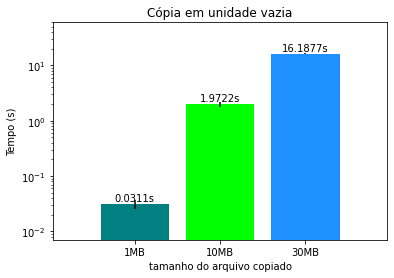

In [166]:
create_plot(title='Cópia em unidade vazia', x_ticks=['1MB', '10MB', '30MB'], x_label='tamanho do arquivo copiado', y_label='Tempo (s)', data=[copia_1_0, copia_10_0, copia_30_0])

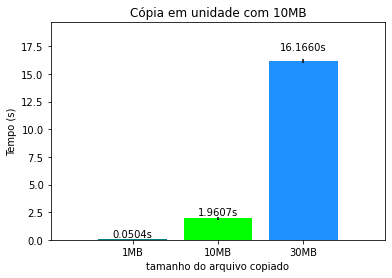

In [175]:
create_plot(title='Cópia em unidade com 10MB', x_ticks=['1MB', '10MB', '30MB'], x_label='tamanho do arquivo copiado', y_label='Tempo (s)', data=[copia_1_10, copia_10_10, copia_30_10], scale='linear')

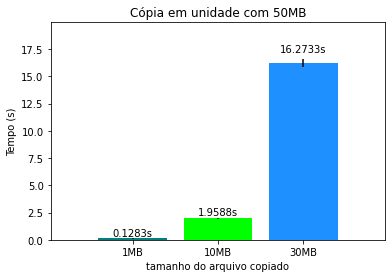

In [176]:
create_plot(title='Cópia em unidade com 50MB', x_ticks=['1MB', '10MB', '30MB'], x_label='tamanho do arquivo copiado', y_label='Tempo (s)', data=[copia_1_50, copia_10_50, copia_30_50], scale='linear')

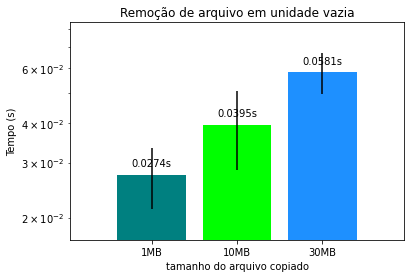

In [170]:
create_plot(title='Remoção de arquivo em unidade vazia', x_label='tamanho do arquivo copiado', x_ticks=['1MB', '10MB', '30MB'], y_label='Tempo (s)', data=[rm_1_0, rm_10_0, rm_30_0])

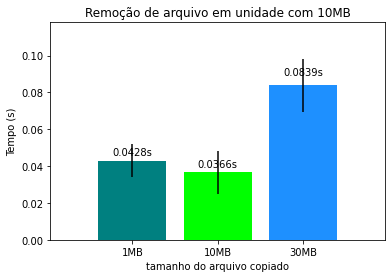

In [171]:
create_plot(title='Remoção de arquivo em unidade com 10MB', x_ticks=['1MB', '10MB', '30MB'], x_label='tamanho do arquivo copiado', y_label='Tempo (s)', data=[rm_1_10, rm_10_10, rm_30_10], scale='linear')

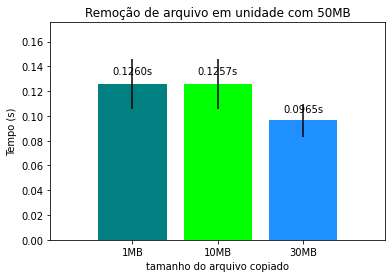

In [173]:
create_plot(title='Remoção de arquivo em unidade com 50MB', x_ticks=['1MB', '10MB', '30MB'], x_label='tamanho do arquivo copiado', y_label='Tempo (s)', data=[rm_1_50, rm_10_50, rm_30_50], scale='linear')

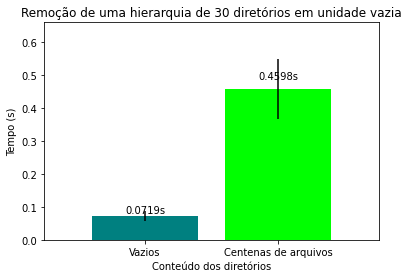

In [172]:
create_plot(title='Remoção de uma hierarquia de 30 diretórios em unidade vazia', x_ticks=['Vazios', 'Centenas de arquivos'], x_label='Conteúdo dos diretórios', y_label='Tempo (s)', data=[rmdir_vazios, rmdir_cheios], scale='linear')

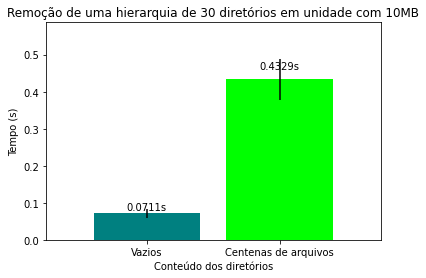

In [156]:
create_plot(title='Remoção de uma hierarquia de 30 diretórios em unidade com 10MB', x_ticks=['Vazios', 'Centenas de arquivos'], x_label='Conteúdo dos diretórios', y_label='Tempo (s)', data=[rmdir_10_vazios, rmdir_10_cheios], scale='linear')

/home/daniel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/daniel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/daniel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/daniel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/home/daniel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/daniel/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False,

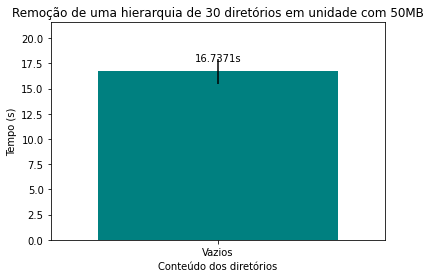

In [158]:
create_plot(title='Remoção de uma hierarquia de 30 diretórios em unidade com 50MB', x_ticks=['Vazios', 'Centenas de arquivos'], x_label='Conteúdo dos diretórios', y_label='Tempo (s)', data=[rmdir_50_vazios, []], scale='linear')